In [3]:
import sir, sis, sirs, sirs_stats, sirs_heat, branching
from importlib import reload
reload(sir)
reload(sis)
reload(sirs)
reload(sirs_stats)
reload(sirs_heat)
reload(branching)
import networkx as nx

# Comportements SIR
## Consommation
Au bout d'une dizaine de tours, la population entière est consomée.

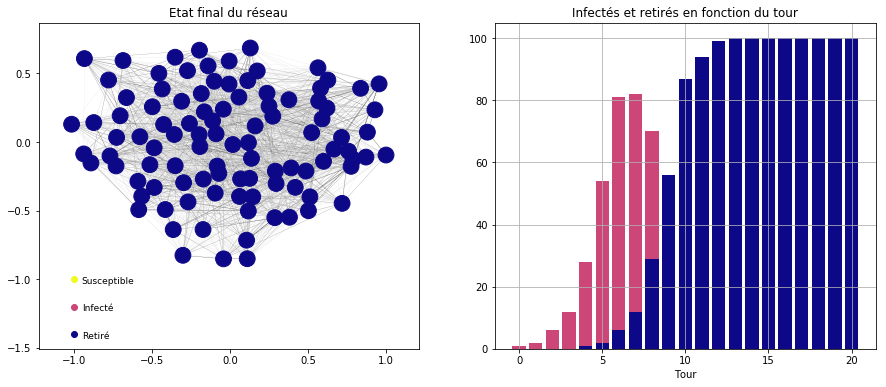

In [34]:
sir.plot(100, 3, 0.1, 20)

## Etouffement
Au bout de quelques (4-5) tours, l'épidémie échoue à se reproduire.

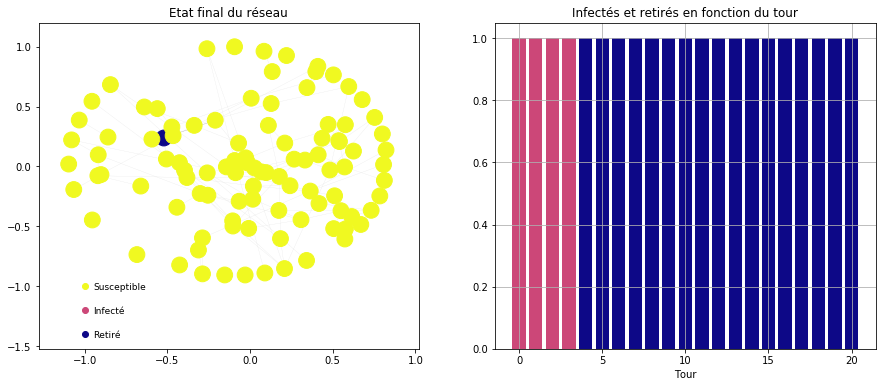

In [35]:
sir.plot(100, 3, 0.01, 20, density=0.01)

## Consommation partielle
Dépendant des conditions, cette épidemie mourra en un temps fini, mais touchera rarement toute la population.

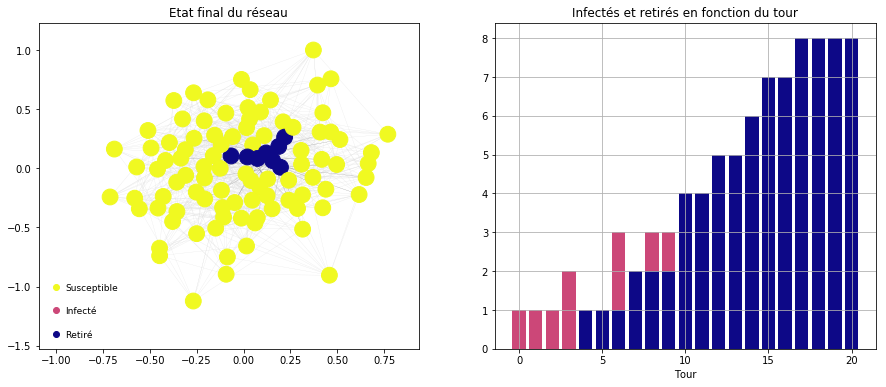

In [37]:
sir.plot(100, 3, 0.05, 20, density=0.07)

# Modèle d'arbre
L'arbre a deux comportements typiques, selon la valeur de R0.

## Etouffement
Cas fréquent pour `R0 << 1`.

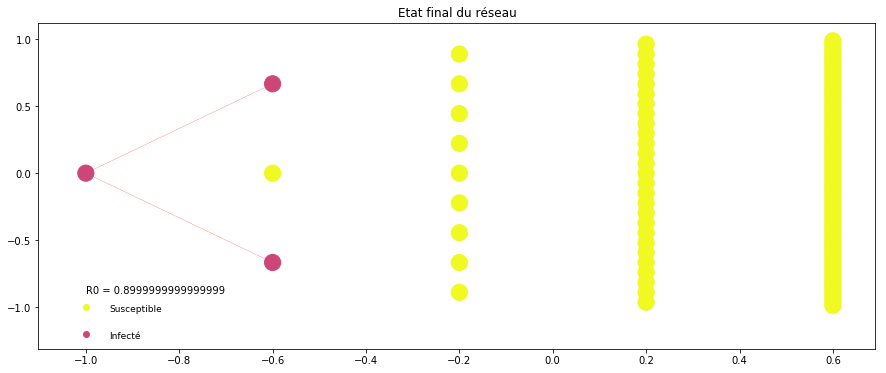

In [38]:
branching.plot(n=5, k=3, p=0.3)

# Survie et multiplication
Cas fréquent pour `R0 >> 1`.

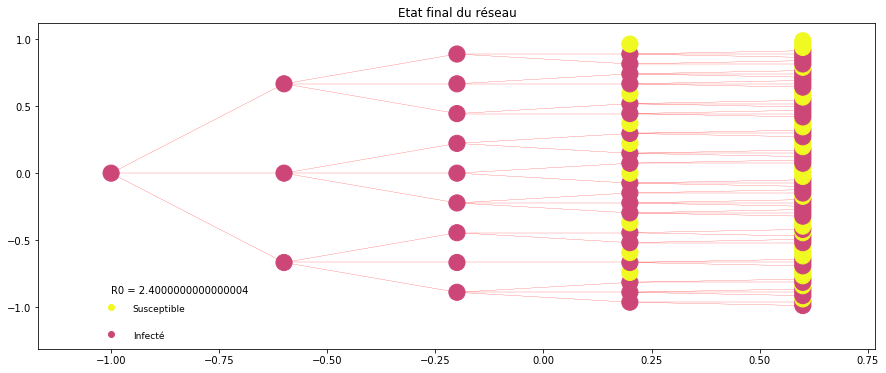

In [42]:
branching.plot(n=5, k=3, p=0.8)

# Oscillations dans le modèle SIRS
On peut obtenir des oscillations dans le modèle SIRS, grace à des synchronisations d'immunité.

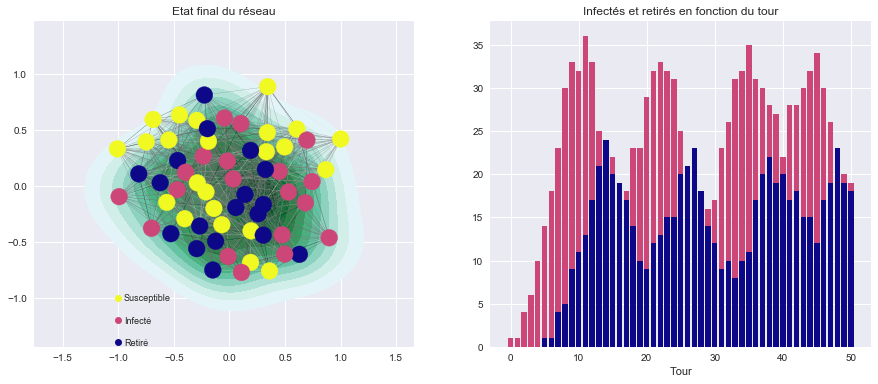

In [4]:
sirs_heat.plot(turns=50)

On observe ces oscillations dans l'animation:

In [2]:
%%HTML
<video autoplay loop>
    <source src="animate/final.mkv" type="video/mp4">
</video>

Les oscillations sont suffisament aléatoires pour qu'**en moyenne, elles s'annulent.**

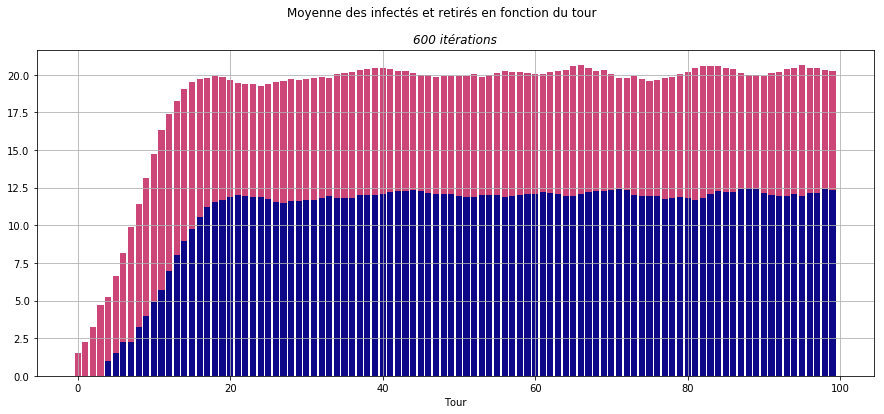

In [46]:
sirs_stats.plot_avg()

# Modèle Watts et Strogatz
Les graphes *Watts et Strogatz* permettent de créer des graphes de type "petit monde", où les personnes sont rassmblées en petits groupes qui sont reliés entre eux.

Dans le modèle **SIRS**, cela donne lieu à des oscillations, avec des synchronisations entre les sous-groupes.

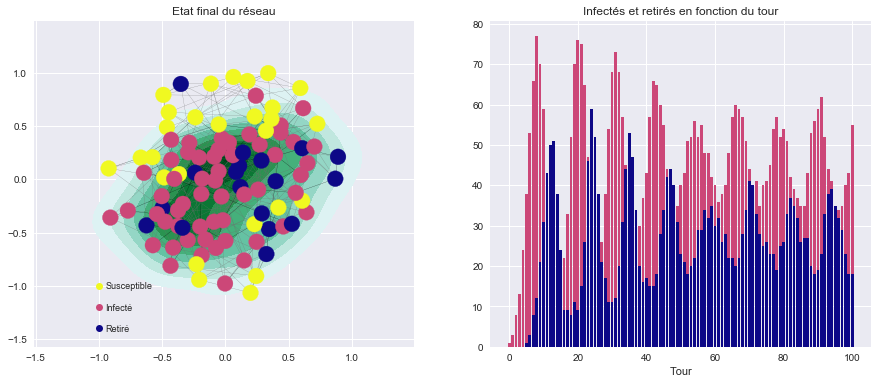

In [5]:
g = nx.watts_strogatz_graph(100, 6, 0.5)
sirs_heat.plot(graph=g, p=0.2, turns=100)

On peut observer l'intensité du phénomène de 'petit monde' en visualisant un tel graphe.

In [6]:
import jgraph as j
converted = {'nodes': {str(i): {} for i in g.nodes()}, 'edges': [{'source': e[0], 'target': e[1]} for e in g.edges()]}
j.draw(converted, directed=False, default_edge_color=0x757575, default_node_color=0x68a4ff)

On notera cette fois-ci que les oscillations s'annulent pour faire disparaitre l'épidémie, en moyenne.

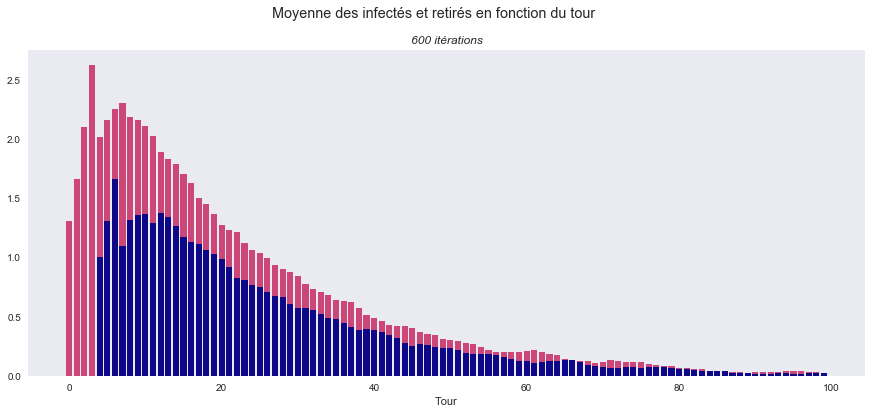

In [7]:
sirs_stats.plot_avg(graph=g)

# Graphe 'barbell'
Le graphe barbell donne un cas spécial de 'petit monde'. L'épidémie n'a qu'un court passage pour traverser.

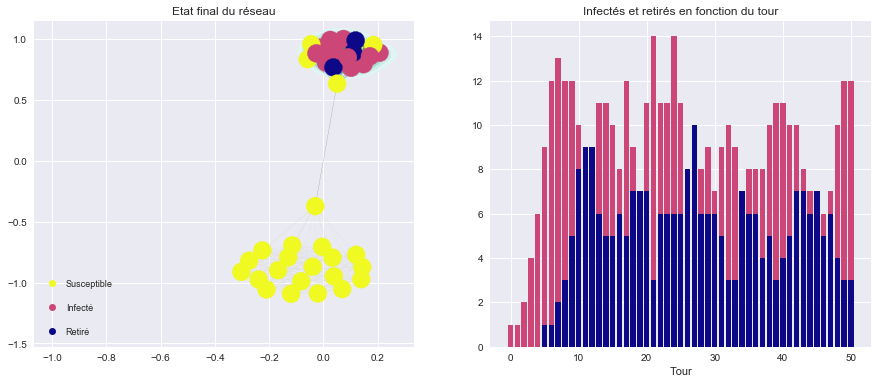

In [10]:
g = nx.barbell_graph(20, 0)
sirs_heat.plot(graph=g, turns=50)

En moyenne, ce genre de graphe permet à l'épidémie de survivre facilement, mais finit par la tuer.

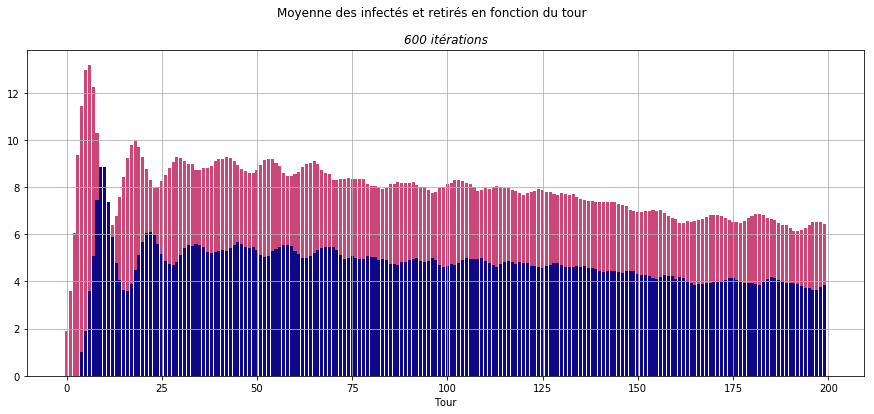

In [69]:
sirs_stats.plot_avg(graph=g, turns=200)